# モルフォロジー変換
## 目的
このチュートリアルでは，
* 膨張処理，収縮処理といったモルフォロジー処理について学ぶ．
* 次の関数の使い方を学ぶ :<A HREF="http://docs.opencv.org/3.0-beta/modules/imgproc/doc/filtering.html?highlight=cv2.erode#cv2.erode" target="_blank">cv2.erode()</A>,<A HREF="http://docs.opencv.org/3.0-beta/modules/imgproc/doc/filtering.html?highlight=cv2.dila#cv2.dilate" target="_blank">cv2.dilate()</A>, <A HREF="http://docs.opencv.org/3.0-beta/modules/imgproc/doc/filtering.html?highlight=cv2.morphology#cv2.morphologyEx" target="_blank">cv2.morphologyEx()</A>.

## 理論
モルフォロジー変換は主に二値画像を対象とし，画像上に写っている図形に対して作用するシンプルな処理のことである.モルフォロジー変換には入力画像と 処理の性質を決める 構造的要素 ( カーネル )の二つを入力とする．基本的なモルフォロジー処理として，収縮(Erosion)と膨張(Dilation)が挙げられる．この他に，この二つの処理を組み合わせたオープニングとクロージングといった処理もある．このチュートリアルでは，これらの処理を一つ一つ紹介していく．

![](http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/_images/j.png)

## 1. 収縮(Erosion)
収縮のアイディアは縮む珪藻から来ており、前景物体の境界が浸食されていくような処理を指す(常に白色の前景物体を残すようにする)．どうすればこのような処理を実現できるのだろうか？画像に対して(フィルタリング，2D convolutionに使われる)カーネルをスライドさせていきいく．原画像中の(1か0のどちらかの値を持つ)画素は，カーネルの領域に含まれる画素の画素値が全て1であれば1となり，そうでなければ0として出力される．

カーネルのサイズによって物体の境界付近の全画素が白(1)から黒(0)になり，消えてしまう．結果として白い画素(前景物体)が占める領域が収縮するように見えるため、収縮と呼ばれている．この収縮処理は，(色空間のチュートリアルで紹介した)画像中の白色雑音(ノイズ)の除去や、連結している複数の物体を分割する時などに有効である．

ここでは全要素の値が1の5x5サイズのカーネルを例に使う．早速どのような結果になるか見てみよう(<A HREF="http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/_images/j.png">対象画像</A>) :

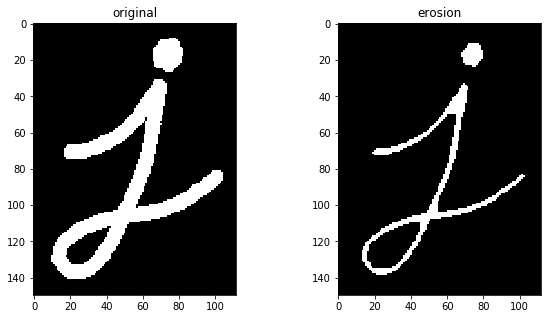

In [9]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('j.png',0)
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('original')
plt.imshow(img,cmap='gray')
plt.subplot(1,2,2)
plt.title('erosion')
plt.imshow(erosion,cmap='gray')
plt.show()

## 2. 膨張(Dilation)
膨張は収縮の逆の処理である．カーネル内に画素値が `1` の画素が一つでも含まれれば，出力画像の注目画素の画素値を`1`にします．画像中の白色の領域を増やすとも言えるし、前景物体のサイズを増やすとも言える．普通は収縮の後に膨張させるノイズの除去方法で使われる．つまり、前景物体を膨張させるわけである．一度ノイズを消してしまえば，ノイズが再び発生することは無くなり，物体の領域が増える．また、ばらばらのパーツをくっつけたりするのにも便利である

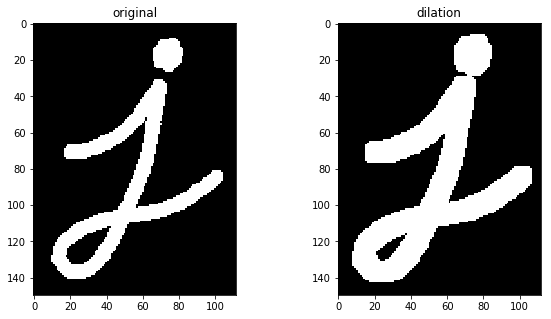

In [8]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('j.png',0)
kernel = np.ones((5,5),np.uint8)
dilation = cv2.dilate(img,kernel,iterations = 1)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('original')
plt.imshow(img,cmap='gray')
plt.subplot(1,2,2)
plt.title('dilation')
plt.imshow(dilation,cmap='gray')
plt.show()

## 3. オープニング(Opening)
オープニング処理は 収縮の後に膨張 をする処理である．前述したようにノイズ除去に有効である．関数は `cv2.morphologyEx()` を使い、第２引数に`cv2.MORPH_OPEN`を指定する(<A HREF="http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/py_tutorials/py_imgproc/py_morphological_ops/j-noised.png">ノイズのある画像</A>):

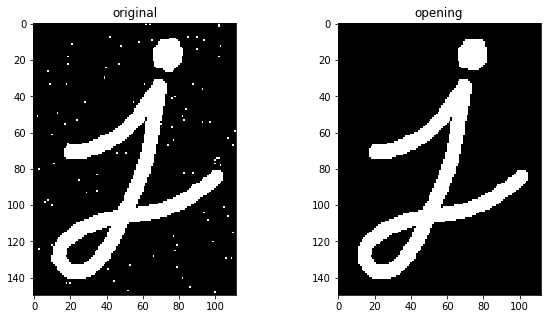

In [11]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('j-noised.png',0)
kernel = np.ones((5,5),np.uint8)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)  # 第２引数に'cv2.MORPH_OPEN'を指定

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('original')
plt.imshow(img,cmap='gray')
plt.subplot(1,2,2)
plt.title('opening')
plt.imshow(opening,cmap='gray')
plt.show()

## 4. クロージング(Closing)
クロージング処理はオープニング処理の逆の処理であり， 膨張の後に収縮 をする処理である．前景領域中の小さな(黒い)穴を埋めるのに役立る．オープニングと同様 `cv2.morphologyEx() `関数を使うが，第2引数のフラグに `cv2.MORPH_CLOSE` を指定する点が異なる(<A HREF="http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/py_tutorials/py_imgproc/py_morphological_ops/j-noised2.png"> 対象画像</A>)．

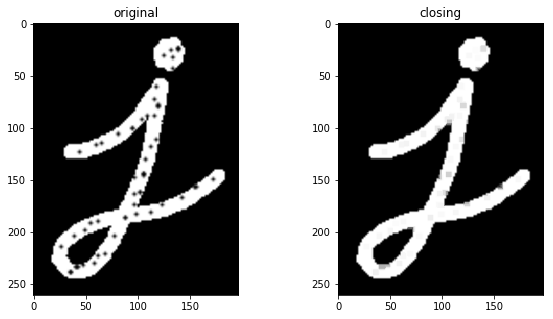

In [12]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('j-noised2.png',0)
kernel = np.ones((5,5),np.uint8)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)   # 第２引数が異なる

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('original')
plt.imshow(img,cmap='gray')
plt.subplot(1,2,2)
plt.title('closing')
plt.imshow(closing,cmap='gray')
plt.show()

## 5. モルフォロジー勾配
膨張した画像と収縮した画像の差分をとる処理である

結果として物体の外郭(境界線)が得られる: 

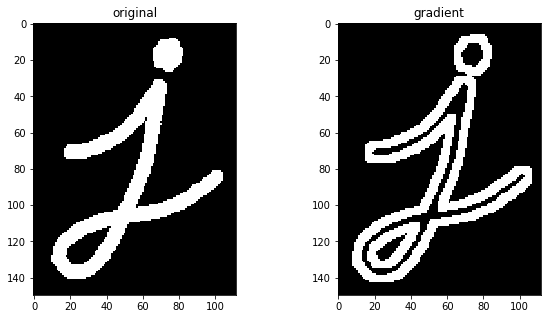

In [13]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('j.png',0)
kernel = np.ones((5,5),np.uint8)
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('original')
plt.imshow(img,cmap='gray')
plt.subplot(1,2,2)
plt.title('gradient')
plt.imshow(gradient,cmap='gray')
plt.show()

## 6. トップハット変換
入力画像とオープニング画像の差を取る処理である．次の例では9x9サイズのカーネルを使っている:

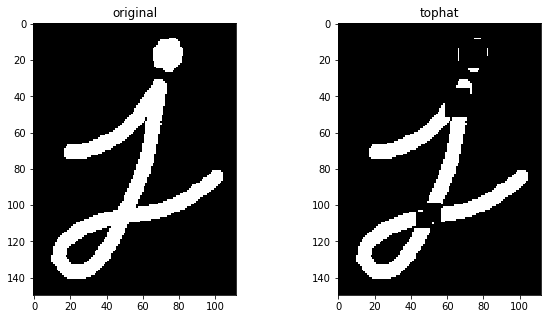

In [18]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('j.png',0)
kernel = np.ones((9,9),np.uint8)    # サイズを変更している
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('original')
plt.imshow(img,cmap='gray')
plt.subplot(1,2,2)
plt.title('tophat')
plt.imshow(tophat,cmap='gray')
plt.show()

## 7. ブラックハット変換
入力画像とクロージング画像の差を取る処理である 

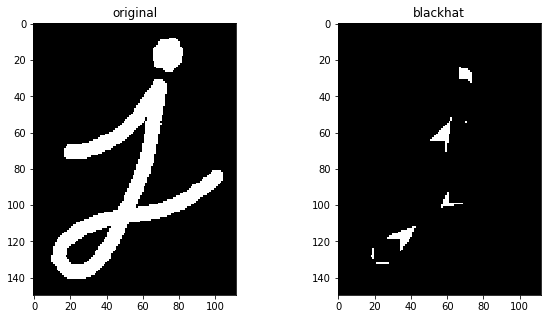

In [19]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('j.png',0)
kernel = np.ones((9,9),np.uint8)
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('original')
plt.imshow(img,cmap='gray')
plt.subplot(1,2,2)
plt.title('blackhat')
plt.imshow(blackhat,cmap='gray')
plt.show()

## 構造的要素
前の例ではNumpyを使用して手作業で構造的要素(カーネル)を作成した．作成したカーネルは矩形であったが，時には楕円形や円形カーネルが必要になる時がある．このようなカーネルの作成をする時は <A HREF="http://docs.opencv.org/3.0-beta/modules/imgproc/doc/filtering.html?highlight=cv2.getstructuringe#cv2.getStructuringElement" target="_blank">cv2.getStructuringElement()</A> 関数を使う．カーネルの形状とサイズを指定するだけで，期待するカーネルを取得できる．



In [20]:
# 矩形カーネル
cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [21]:
# 楕円形カーネル
cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))

array([[0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [22]:
# 十字型カーネル
cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

## 補足資料
* <A HREF="http://homepages.inf.ed.ac.uk/rbf/HIPR2/morops.htm" target="_blank">モルフォロジカル処理</A>at HIPR2

## 目次
* [最初に戻る]( http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/Notebook/usingOpenCV.html )
* 一つ上: OpenCVを使った画像処理<BR>
OpenCVが提供する様々な画像処理の関数について学ぶ
* 前の学習項目 [画像の平滑化 smoothing.ipynb]( http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/Notebook/smoothing.html)<BR> 
画像の平滑化及び自作した線形フィルタを使った画像のフィルタリング方法を学ぶ．
* 次の学習項目 [画像の勾配 gradient.ipynb](http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/Notebook/gradient.html)<BR>
画像の勾配，エッジなどの検出方法を学ぶ．